## MUSIC SIGNAL ANALYSIS THEORY AND EXPLANATION

* Import required libraries and other dependencies

In [2]:
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn,IPython.display as ipd
import matplotlib.style as ms
import librosa.display
ms.use('seaborn-muted')
import config
%matplotlib inline

In [3]:
float_formatter = lambda x: "%.4f" % x
numpy.set_printoptions(formatter={'float_kind':float_formatter})

#### HOW HUMANS RECOGNIZE MUSIC ?
* Vibration of air molecules (Sound Waves)
* Capturing sounds waves with external ear
* Sending waves to middle air
* Converting sound waves into sound signals 
* Sending signals through auditory nerves to brain

#### HOW TO CONVERT ANALOG SIGNALS TO DIGITAL SIGNALS
* An analog signal is a continuous wave denoted by a sine wave (pictured below) and may vary in signal strength (amplitude) or frequency (time).

* A digital signal - a must for computer processing - is described as using binary (0s and 1s), and therefore, cannot take on any fractional values.

* We do quantization to get digital signals from analog signals. Digital computers can only capture this data at discrete moments in time. The rate at which a computer captures audio data is called the sampling rate.

* For example if we use 44.1 KHz sampling rate, it means that we use 44100 samples per second.

* **_Information:_** Humans can hear the sounds between 0-140 dB and 20-20000 Hz !

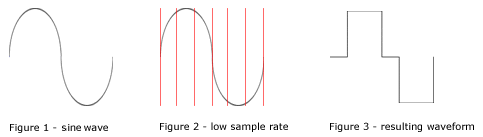

In [4]:
ipd.Image(filename='./Resources/low.jpg')


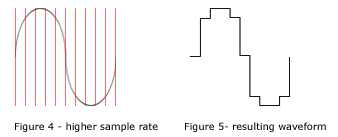

In [5]:
ipd.Image(filename='./Resources/high.jpg')

**Let's work with an example:**
* Let's take two songs from GTZAN dataset as arrays of samples.
* Sampling rate is 22050 Hz.
* We take 5 seconds slices from songs.

In [6]:
sampling_rate=22050
x_metal,sr=librosa.load("./Resources/metal.00001.wav",sr=sampling_rate,mono=True,duration=5.0)
x_classical,sr=librosa.load("./Resources/classical.00001.wav",sr=sampling_rate,mono=True,duration=5.0)

In [7]:
print("Overview array of samples for Metal song:(size={})\n{}\n ".format(x_metal.shape,x_metal))
print("Overview array of samples for Classical song:(size={})\n{}".format(x_classical.shape,x_classical))

Overview array of samples for Metal song:(size=(110250,))
[0.1165 0.1194 0.1234 ... -0.1172 -0.0706 0.0141]
 
Overview array of samples for Classical song:(size=(110250,))
[-0.0114 -0.0022 0.0169 ... 0.0383 0.0365 0.0305]


* We got 110250 samples with 22.05 KHz sampling rate.
* We got an array of samples for each song
* Every member of the array is a sample from signal.
* Let's plot the waveplots for each song.

Text(0.5, 1.0, 'Clasical')

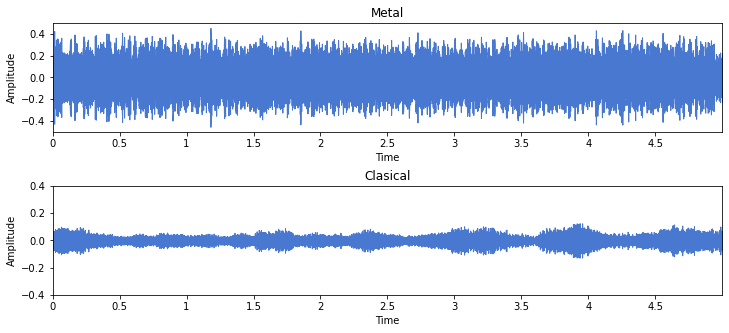

In [8]:
#Waveplot - Time Domain

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_metal,sampling_rate)
plt.title('Metal')

plt.subplot(2, 1, 2)
plt.ylim(-0.4,0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_classical,sampling_rate)
plt.title('Clasical')

* Let's play the songs.

In [9]:
ipd.Audio(x_metal, rate=sampling_rate)

In [10]:
ipd.Audio(x_classical, rate=sampling_rate)

* With waveplots, we only have Amplitude and time information.
* We can't learn so much from only waveplots.
* Thus, we use - Fourier Tranform
* In audio processing, we operate on one frame at a time using a constant frame size and hop size. Frames are typically chosen to be 10 to 100 ms in duration.
* We compute features from frames.

* **_IMPORTANT Terms:_**
 - Frame Length: The number of samples in a frame.
 - Hop Length: The length between frames. (in samples)

* We use 2048 frame length and 512 hop length for this work.
* Also these values are the deafults for Librosa.

In [11]:
hop_size=512
frame_size=2048

In [12]:
#Segmentation
F=librosa.util.frame(x_metal,frame_length=frame_size,hop_length=hop_size)
x,y=F.shape

print("Number of frames={} with frame size={} for Metal song".format(y,x))
print("Total number of samples= {}\n".format(y*x+hop_size))
print(F)

F2=librosa.util.frame(x_classical,frame_length=frame_size,hop_length=hop_size)
x2,y2=F2.shape

print("\nNumber of frames={} with frame size={} for Classical song".format(y2,x2))
print("Total number of samples= {}\n".format(y2*x2+hop_size))
print(F2)

Number of frames=212 with frame size=2048 for Metal song
Total number of samples= 434688

[[0.1165 -0.0085 0.0128 ... 0.0222 -0.0954 -0.1196]
 [0.1194 -0.1501 0.0197 ... 0.0774 -0.1232 -0.1897]
 [0.1234 -0.1673 0.0392 ... -0.0791 -0.1354 -0.1052]
 ...
 [-0.1609 0.0424 0.0199 ... 0.0194 0.0811 -0.1163]
 [-0.1255 -0.0146 -0.0022 ... 0.0550 0.1528 -0.0857]
 [-0.1257 -0.1062 -0.0261 ... 0.0807 0.0930 -0.0690]]

Number of frames=212 with frame size=2048 for Classical song
Total number of samples= 434688

[[-0.0114 0.0450 -0.0739 ... 0.0551 0.0125 0.0472]
 [-0.0022 0.0277 -0.0708 ... 0.0639 0.0123 0.0596]
 [0.0169 0.0244 -0.0596 ... 0.0657 0.0210 0.0660]
 ...
 [0.0280 -0.0388 -0.0469 ... 0.0104 -0.0251 -0.0146]
 [0.0168 -0.0306 -0.0450 ... 0.0028 -0.0121 -0.0061]
 [0.0062 -0.0214 -0.0383 ... -0.0015 -0.0075 -0.0044]]


* If we can find the most valuable points in a signal and do segmentation after that points we can have valuable information with less frames.
* ONSET DETECTION:
    - Automatic detection of musical events in an audio signal is one of the most fundamental tasks in music information retrieval (MIR).
    Here, we will detect an onset, the very instant that marks the beginning of the important part of a sound, or the earliest moment at which it can be reliably detected.

In [13]:
#Onset Detection
onset_frames = librosa.onset.onset_detect(x_metal, sr=sampling_rate,hop_length=hop_size)
onset_times = librosa.frames_to_time(onset_frames)
x=onset_frames.size
print("Number of detected onsets for Metal song = {}".format(x))
print(onset_frames)


onset_frames2 = librosa.onset.onset_detect(x_classical, sr=sampling_rate,hop_length=hop_size)
onset_times2 = librosa.frames_to_time(onset_frames2)
x2=onset_frames2.size
print("\nNumber of detected onsets for Classical song = {}".format(x2))
print(onset_frames2)

Number of detected onsets for Metal song = 33
[  3   7  11  19  27  35  44  48  51  60  68  77  84  93  98 101 110 118
 127 131 135 144 151 156 163 168 175 180 184 193 196 201 205]

Number of detected onsets for Classical song = 23
[  5  18  26  46  50  56  69  80  83  91 106 113 122 128 134 146 157 166
 168 180 190 200 211]


* We plot the waveplot with the detected onsets. (Marked in red)

Text(0.5, 1.0, 'Classical')

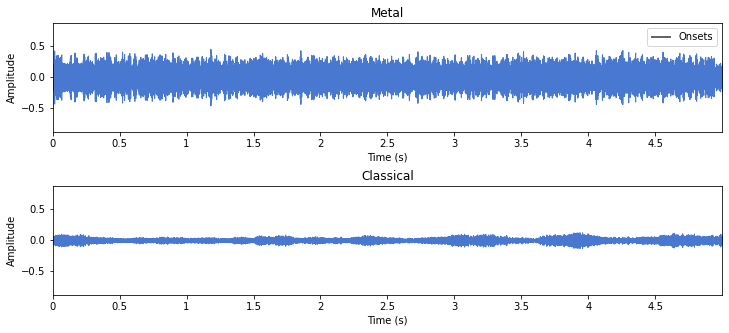

In [22]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
librosa.display.waveplot(x_metal, sr=sampling_rate)
plt.vlines(onset_times*1000, -0.8, 0.79, linestyles='solid', label='Onsets', color='k', alpha=0.8)
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Metal')
# plt.show()

plt.subplot(2,1,2)
librosa.display.waveplot(x_classical, sr=sampling_rate)
plt.vlines(onset_times2*1000, -0.8, 0.79, linestyles='solid', label='Onsets', color='k', alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Classical')

In [27]:
# plt.vlines((1, 3, 5,), 0, 10, colors = ("r", "g", "b"), 
#          linestyles = ("solid", "dashed", "dotted")) 
  
# plt.show()
# plt.vlines([1,2,3], 0, 1, label='test')
# plt.legend()

* Let's create a click sound and add this sound to each onset on signal

In [15]:
clicks = librosa.clicks(frames=onset_frames, sr=sampling_rate, length=len(x_metal))
ipd.Audio(x_metal + clicks, rate=sampling_rate)

In [16]:
clicks = librosa.clicks(frames=onset_frames2, sr=sampling_rate, length=len(x_classical))
ipd.Audio(x_classical + clicks, rate=sampling_rate)

<br>
==========================

* **Fourier Transform**
* The Fourier Transform is the most fundamental operations in applied mathematics and signal processing.
* It transforms our time-domain signal into the frequency domain.
* Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets.
 


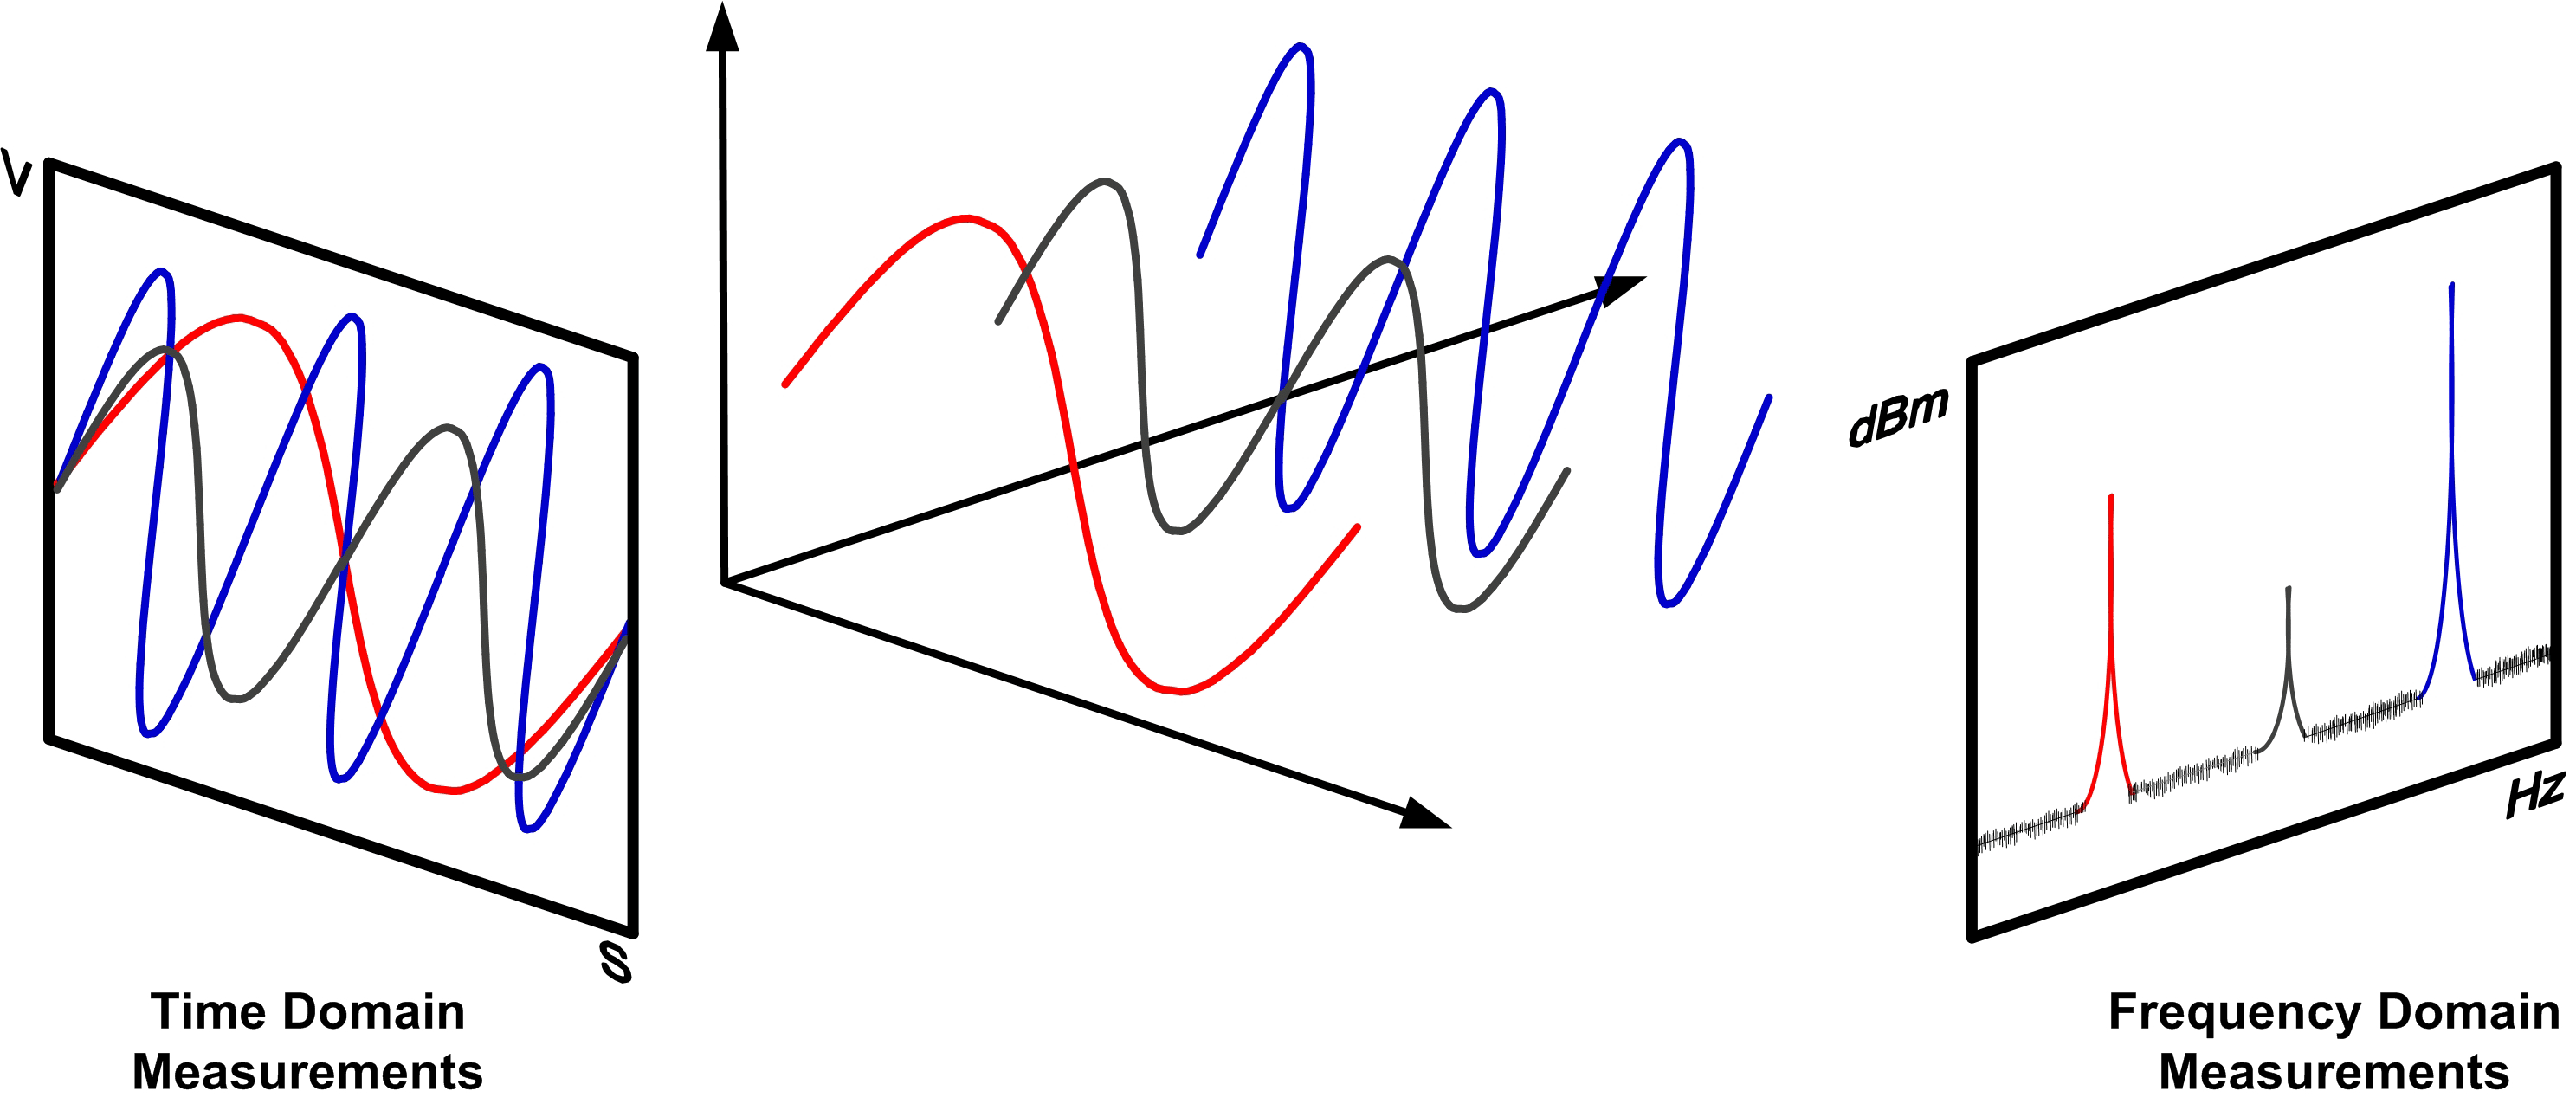

In [22]:
ipd.Image(filename='./Resources/time_and_freq.jpg')

In [23]:
ipd.display(ipd.Image(url='https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif'))

* Let's compute FFTs for each song and plot Spectrums.

In [24]:
# # Fourier Transform and Spectrum

# fig=plt.figure(figsize=(12,5))
# fig.subplots_adjust(hspace=.5)

# plt.subplot(2,1,1)
# FFT_Metal=scipy.fft(x_metal)
# FFT_Metal_Mag=numpy.absolute(FFT_Metal)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Amplitude")
# plt.title('Metal')
# plt.plot(FFT_Metal_Mag)

# plt.subplot(2,1,2)
# FFT_Classical=scipy.fft(x_classical)
# FFT_Classical_Mag=numpy.absolute(FFT_Classical)
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Amplitude")
# plt.title('Classical')
# plt.plot(FFT_Classical_Mag)

* We have frequency information of signals.
* But we lost information about time.
* How can we get information about time and frequency at the same time ?
* **Short-Time Fourier Transform**
 - Musical signals are highly non-stationary, i.e., their statistics change over time. It would be rather meaningless to compute a spectrum over an entire 10-minute song.
 - With STFT, we break up the signal into dicsrete windows.
 - We use a window fucntion such as Polynomial, Hanning, Hamming...
 - Each signal within a window is a stationary signal.
 - After we apply FFT over each window we obtain Spectogram of the signal.
 - **_Window Size_:** Number of samples in each window.

Let's compute STFSs for each song and plot Spectograms.

In [25]:
# #Short-Time Fourier Transform and Spectogram

# window_size=2048

# fig=plt.figure(figsize=(12,5))
# fig.subplots_adjust(hspace=.5)

# plt.subplot(2,1,1)
# S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
# logS = librosa.logamplitude(S)
# plt.title('Metal')
# librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')

# plt.subplot(2,1,2)
# S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
# logS2 = librosa.logamplitude(S2)
# plt.title('Classical')
# librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')

* Let's add the onsets that we detected before to Spectograms.

In [26]:
# fig=plt.figure(figsize=(12,5))
# fig.subplots_adjust(hspace=.5)

# plt.subplot(2,1,1)
# S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
# logS = librosa.logamplitude(S)
# plt.title('Metal')
# librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='log')
# plt.vlines(onset_frames, 0, logS.shape[0], color='k', alpha=0.8)
# plt.colorbar(format='%+2.0f dB')

# plt.subplot(2,1,2)
# S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
# logS2 = librosa.logamplitude(S2)
# plt.title('Classical')
# librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='log')
# plt.vlines(onset_frames2, 0, logS.shape[0], color='k', alpha=0.8)
# plt.colorbar(format='%+2.0f dB')

* **Constant-Q Transform**
 - If we want to obtain information about pitch values we use Constant-Q Transform.

Let's apply Constant-Q Transform and obtain Chromagram for each song.

In [27]:
# #Canstant-Q Transform and Chromagram

# fig=plt.figure(figsize=(12,5))
# fig.subplots_adjust(hspace=.5)

# plt.subplot(2,1,1)
# C = librosa.cqt(x_metal, sr=sampling_rate,hop_length=hop_size,real=False,fmin=librosa.note_to_hz('C2'))
# logC = librosa.logamplitude(C)
# plt.title('Metal')
# librosa.display.specshow(logC, sr=sampling_rate, x_axis='time', y_axis='cqt_note',cmap='coolwarm',)
# plt.colorbar(format='%+2.0f dB')

# plt.subplot(2,1,2)
# C2 = librosa.cqt(x_classical, sr=sampling_rate,hop_length=hop_size,real=False,fmin=librosa.note_to_hz('C2'))
# logC2 = librosa.logamplitude(C2)
# plt.title('Classical')
# librosa.display.specshow(logC2, sr=sampling_rate, x_axis='time', y_axis='cqt_note',cmap='coolwarm')
# plt.colorbar(format='%+2.0f dB')

* Let's do the same thing with pitch classes.

In [30]:
# #Canstant-Q Transform and Chromagram with Pitch Classes

# fig=plt.figure(figsize=(12,5))
# fig.subplots_adjust(hspace=.5)

# plt.subplot(2,1,1)
# C = librosa.feature.chroma_cqt(x_metal, sr=sampling_rate,hop_length=hop_size,fmin=librosa.note_to_hz('C2'))
# plt.title('Metal')
# librosa.display.specshow(C, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
# plt.colorbar(format='%+2.0f dB')

# plt.subplot(2,1,2)
# C2 = librosa.feature.chroma_cqt(x_classical, sr=sampling_rate,fmin=librosa.note_to_hz('C2'))
# plt.title('Classical')
# librosa.display.specshow(C2, sr=sampling_rate, x_axis='time', y_axis='chroma',cmap='coolwarm')
# plt.colorbar(format='%+2.0f dB')